In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
d6 = pd.read_csv('data6_processed.csv')
d6.shape
x = np.c_[d6['x'],d6['y']]
y = d6['t']

In [3]:
d66 = np.genfromtxt('data6_processed.csv',delimiter=',',skip_header=1)
d66.shape
xx = d66[:,:2]
yy = d66[:,2]

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [5]:
param_grid = {
    'C': [1.0, 10.0, 50.0],
    'kernel': ['linear','rbf'],
    'gamma': ['auto',1, 0.1]
}

In [6]:
model_svc = SVC()
grid_search = GridSearchCV(model_svc,param_grid,cv=10,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 50.0], 'gamma': ['auto', 1, 0.1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [7]:
print('Best score: ',grid_search.best_score_)
print('Best C: ',grid_search.best_estimator_.C)
print('Best gamma: ',grid_search.best_estimator_.gamma)
print('Beat kernel: ',grid_search.best_estimator_.kernel)

Best score:  0.8933333333333333
Best C:  50.0
Best gamma:  auto
Beat kernel:  linear


In [8]:
np.sum(grid_search.predict(x_test)==y_test)/len(y_test)

0.9

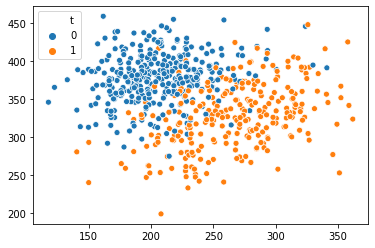

In [9]:
sns.scatterplot(x_train[:,0],x_train[:,1],hue=y_train)

In [10]:
bestSVC = grid_search.best_estimator_
bestSVC

SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
df = pd.read_csv('DiabetesData_PimaIndians.csv')

In [12]:
x = np.array(df.drop('Diabetes',axis=1))
y = df['Diabetes']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
SVCModel = SVC(gamma='scale')
param_grid = {
    'kernel': ['linear','rbf','poly'],
    'degree': [2,3,4],
    'C': [1,10,50,100,1000]
}
grid_search = GridSearchCV(SVCModel,param_grid,cv=5,scoring='accuracy')

In [15]:
grid_search.fit(x_train,y_train)

C:\Users\Cory\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 50, 100, 1000], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [16]:
print('Best score: ',grid_search.best_score_)
print('Best C: ',grid_search.best_estimator_.C)
print('Beat kernel: ',grid_search.best_estimator_.kernel)
print('')
print('BEST PARAMS: ',grid_search.best_params_)

Best score:  0.768566493955095
Best C:  50
Beat kernel:  poly

BEST PARAMS:  {'C': 50, 'degree': 3, 'kernel': 'poly'}


In [18]:
bestModel = grid_search.best_estimator_
metrics.accuracy_score(y_test,bestModel.predict(x_test))

0.8068965517241379